In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

covertype = pd.read_csv('covertype.csv')


In [3]:
covertype

,index,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,wilderness_type,usfs_code,usfs_code_desc,climatic_zone,geologic_zone,cover_type
0,0,2596,51,3,258,0,510,221,232,148,6279,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
1,1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
2,2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,4744,"Legault family - Rock land complex, stony",montane,igneous and metamorphic,Lodgepole Pine
3,3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,7746,Como family - Rock land - Legault family compl...,subalpine,igneous and metamorphic,Lodgepole Pine
4,4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,581007,2396,153,20,85,17,108,240,237,118,837,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581008,581008,2391,152,19,67,12,95,240,237,119,845,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581009,581009,2386,159,17,60,7,90,236,241,130,854,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581010,581010,2384,170,15,60,5,90,230,245,143,864,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine


**Q1) Distribution of cover_type across different wilderness_type**

[Text(0.5, 1.0, 'Distribution of cover type across different wilderness_type')]

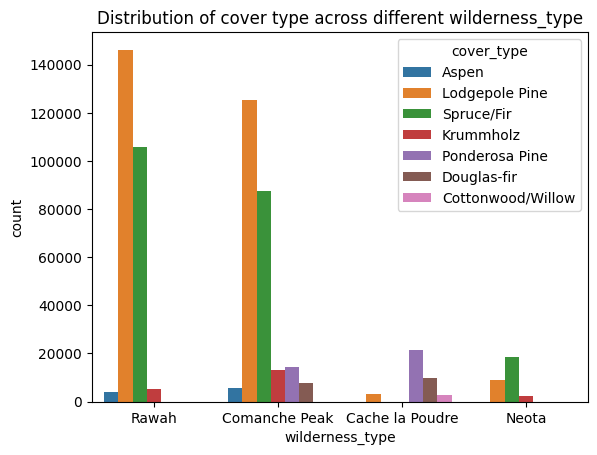

In [4]:
sns.countplot(x='wilderness_type', hue='cover_type',  data=covertype).set(title='Distribution of cover type across different wilderness_type')

**Q2) Distribution of elevation on each cover type**

[Text(0.5, 1.0, 'Distribution of elevation on each cover type')]

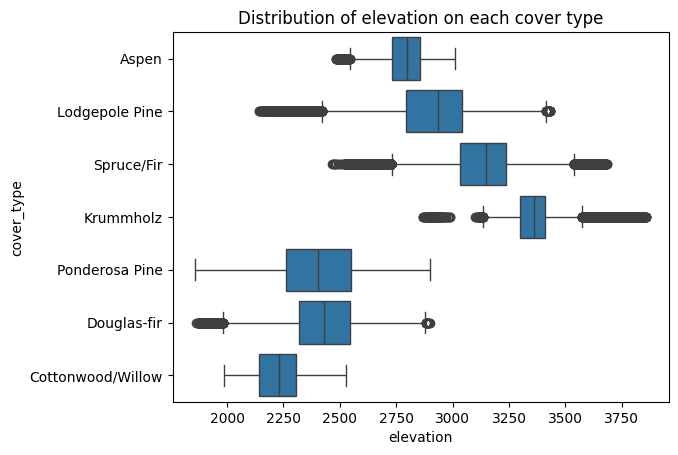

In [5]:
sns.boxplot(x='elevation', y='cover_type',  data=covertype).set(title='Distribution of elevation on each cover type')

**Q3) Number of data points on each climatic zone**

[Text(0.5, 1.0, 'Number of data points on each climatic zone')]

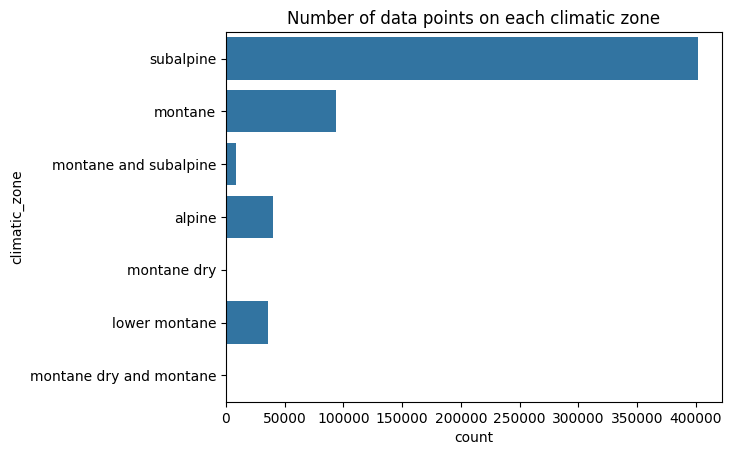

In [6]:
sns.countplot(y='climatic_zone', data=covertype).set(title='Number of data points on each climatic zone')

**Q4) Which cover type dominates subalpine climate?**

[Text(0.5, 1.0, 'Bar graph of cover type in subalpine climatic zone')]

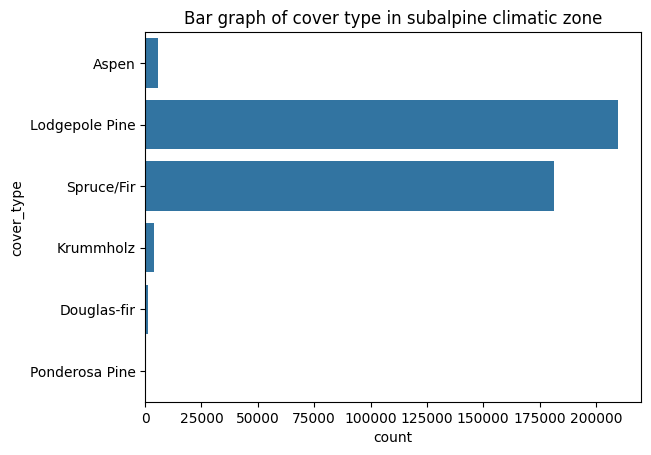

In [7]:
df = covertype[(covertype['climatic_zone'] == 'subalpine')]
sns.countplot(y='cover_type', data=df).set(title='Bar graph of cover type in subalpine climatic zone')

Ans: The cover type that dominate is Lodgepole Pine

**Q5) Which cover type is likely to be found near a body of water?**

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


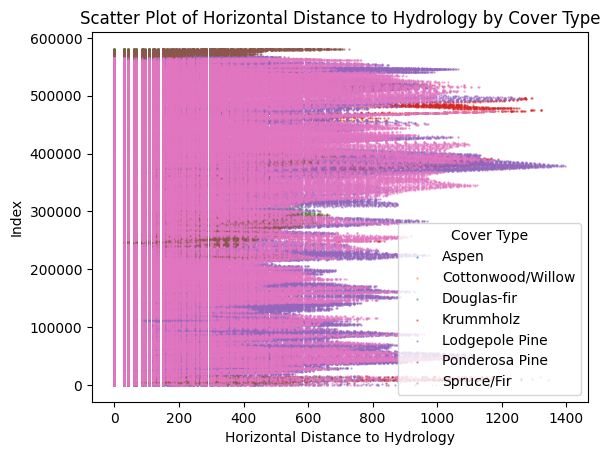

In [8]:
df = pd.read_csv("covertype.csv")

df2 = df[['cover_type','horizontal_distance_to_hydrology']]

df3 = df2.groupby('cover_type')

for cover_type, group in df3:
    plt.scatter(group['horizontal_distance_to_hydrology'], group.index, label=cover_type , alpha=0.5, s=0.5)

plt.xlabel('Horizontal Distance to Hydrology')
plt.ylabel('Index')
plt.title('Scatter Plot of Horizontal Distance to Hydrology by Cover Type')
plt.legend(title='Cover Type')

plt.show()

Ans: The cover type that is likely to be found near a body of water is Lodgepole Pine

**Q6) Which cover type is likely to be found in a shady area from 9 am to noon?**

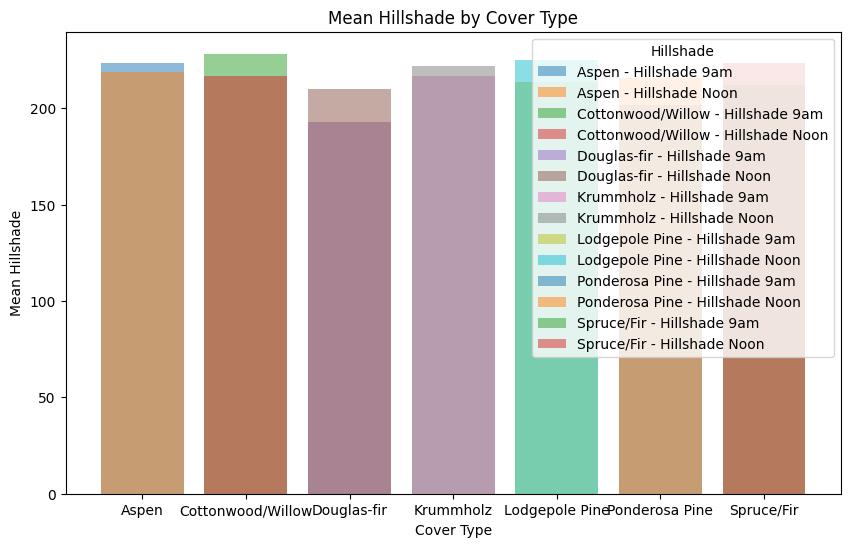

In [24]:
df10 = df[['cover_type', 'hillshade_9am', 'hillshade_noon']]
df11 = df10.groupby('cover_type').mean()

plt.figure(figsize=(10, 6))

for cover_type, group in df11.iterrows():
    plt.bar(cover_type, group['hillshade_9am'], label=f'{cover_type} - Hillshade 9am', alpha=0.5)
    plt.bar(cover_type, group['hillshade_noon'], label=f'{cover_type} - Hillshade Noon', alpha=0.5)

plt.xlabel('Cover Type')
plt.ylabel('Mean Hillshade')
plt.title('Mean Hillshade by Cover Type')
plt.legend(title = 'Hillshade')
plt.show()

Ans: The cover type is likely to be found in a shady area from 9 am to noon is cottonwood/Willow

**Q7) Which cover type is likely to be found away from hazardous points (roadways/firepoints)?**

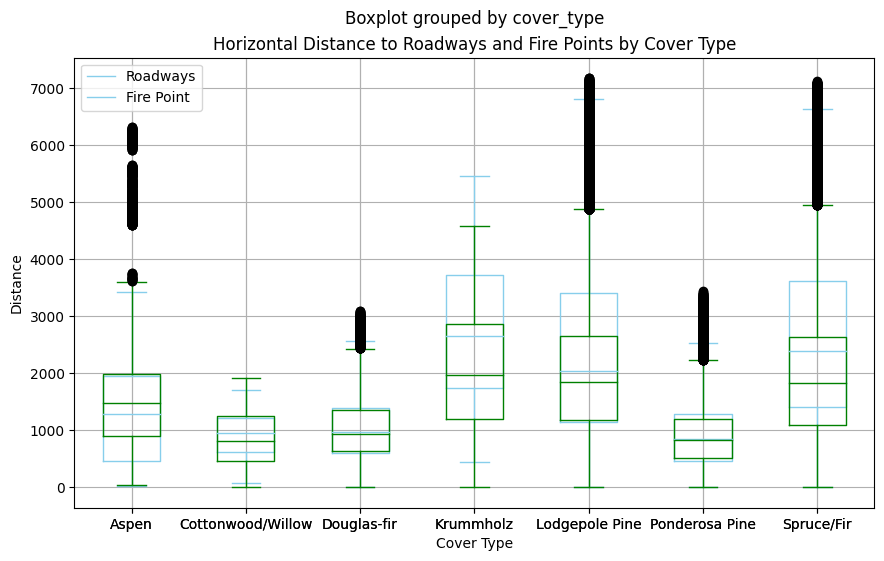

In [25]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 6))

box1 = covertype.boxplot(column='horizontal_distance_to_roadways', by='cover_type', color='skyblue', grid=True, ax=ax)
box2 = covertype.boxplot(column='horizontal_distance_to_fire_points', by='cover_type', color='green', grid=True, ax=ax)

plt.title('Horizontal Distance to Roadways and Fire Points by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Distance')

Roadways = mpatches.Patch(color='skyblue', label='Roadways')
Fire_Point = mpatches.Patch(color='green', label='Fire Point')
plt.legend(['Roadways', 'Fire Point'])

plt.show()


Ans: Lodgepole is likely to be found away from hazardous point.

**Q8) Determine whether elevation provides more information to distinguish Krummholz from Cottonwood/Willow than horizontal_distance_to_hydrology?**

In [11]:
dm = covertype[(covertype['cover_type'] == 'Krummholz') | (covertype['cover_type'] == 'Cottonwood/Willow')]


[Text(0.5, 1.0, 'Box plot of horizontal distance to hydrology by cover type')]

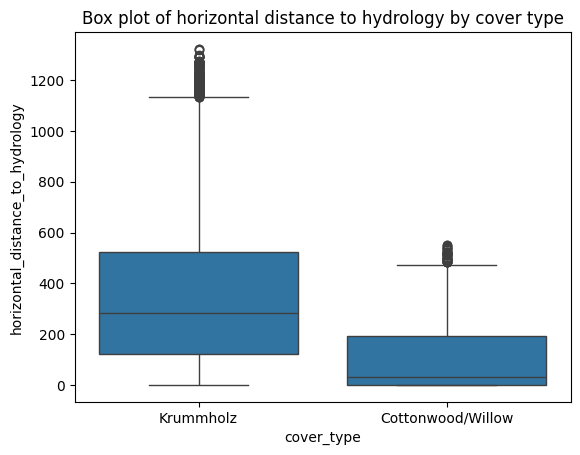

In [12]:
sns.boxplot(y='horizontal_distance_to_hydrology', x='cover_type',  data=dm).set(title='Box plot of horizontal distance to hydrology by cover type')

[Text(0.5, 1.0, 'Box plot of elevation by cover type')]

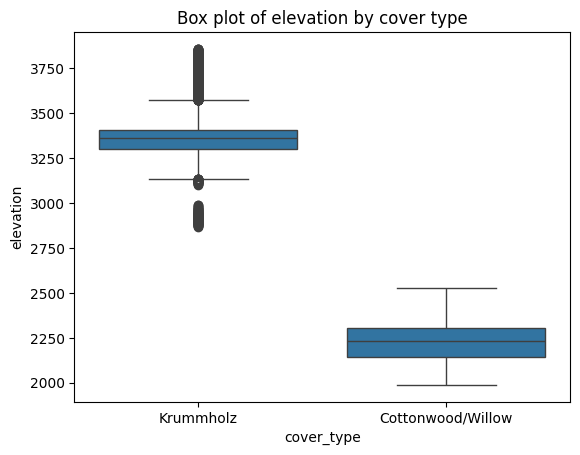

In [13]:
sns.boxplot(y='elevation', x='cover_type',  data=dm).set(title='Box plot of elevation by cover type')

Ans: The elevation can provides more distinguish than horizontal distance to hydrology

**Q9) Compare the relationship between Krummholz and Cottonwood/Willow to geographical features (elevation, distance to hydrology, hillshade, etc.).**

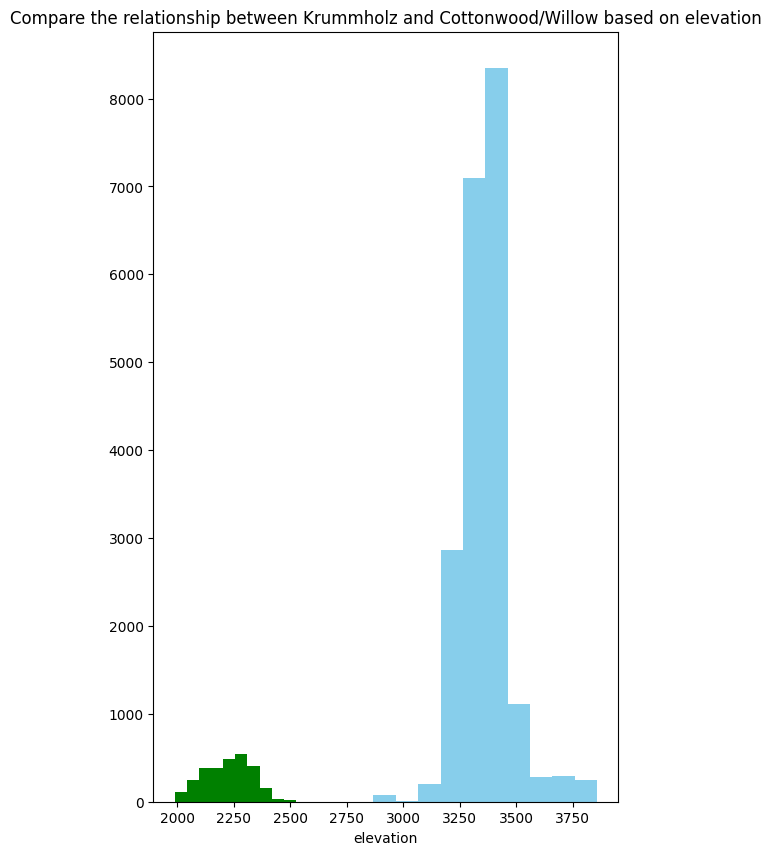

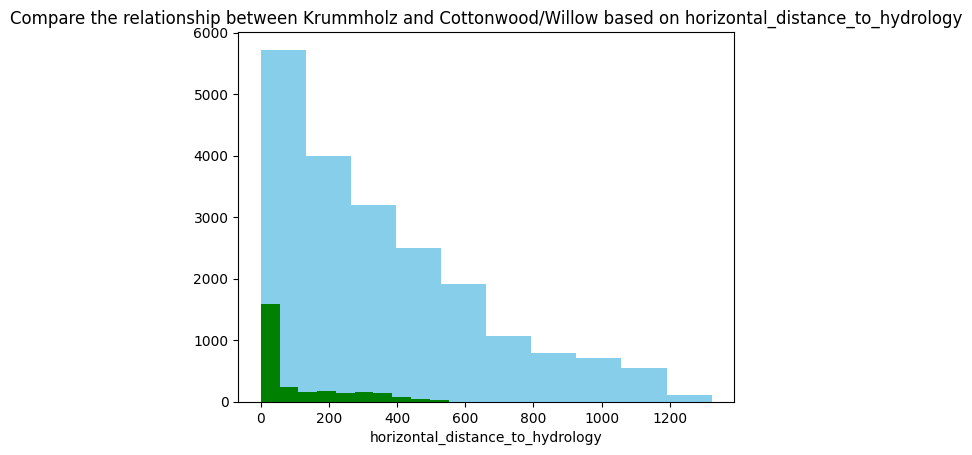

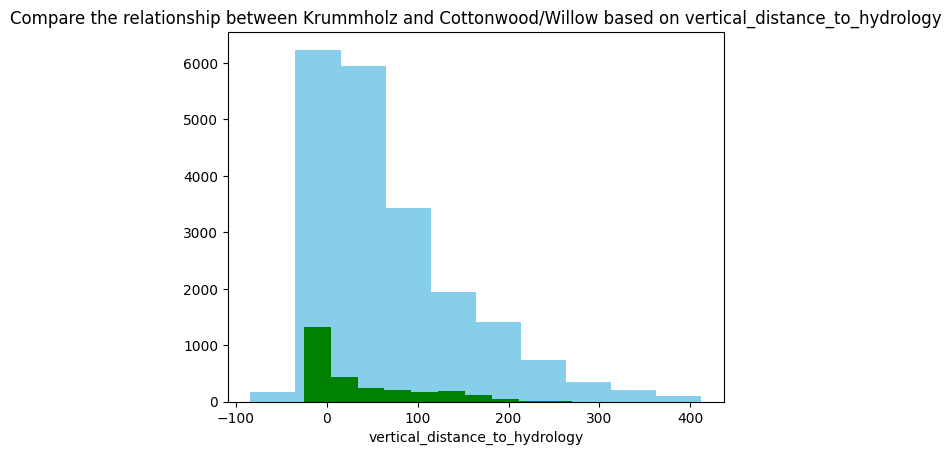

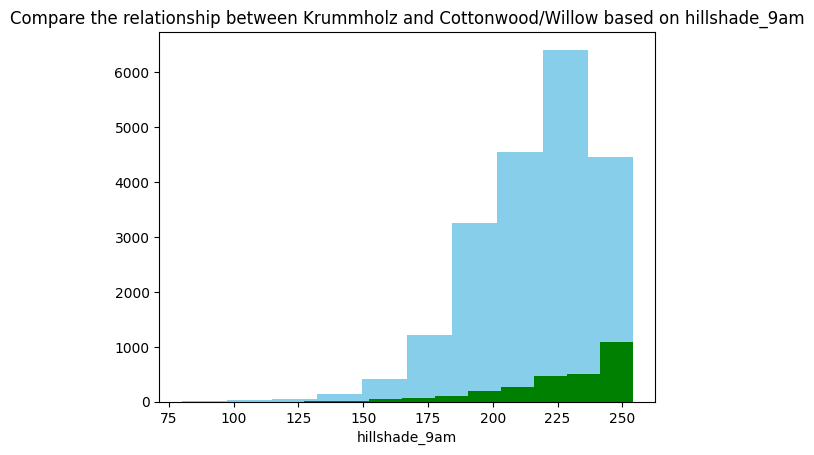

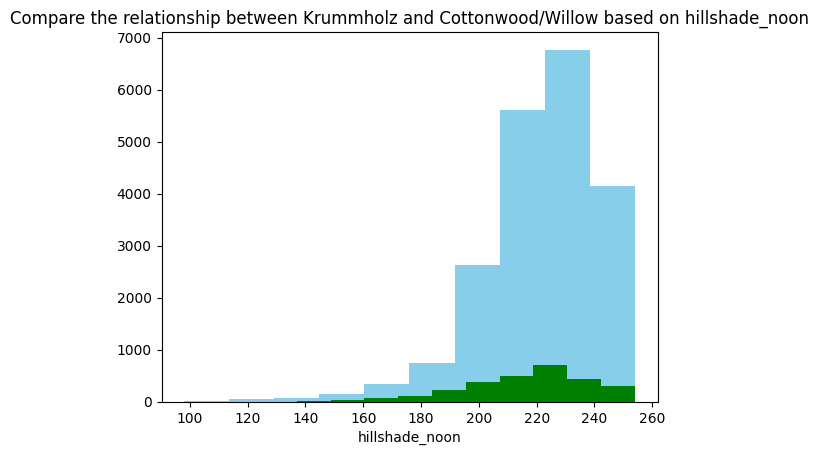

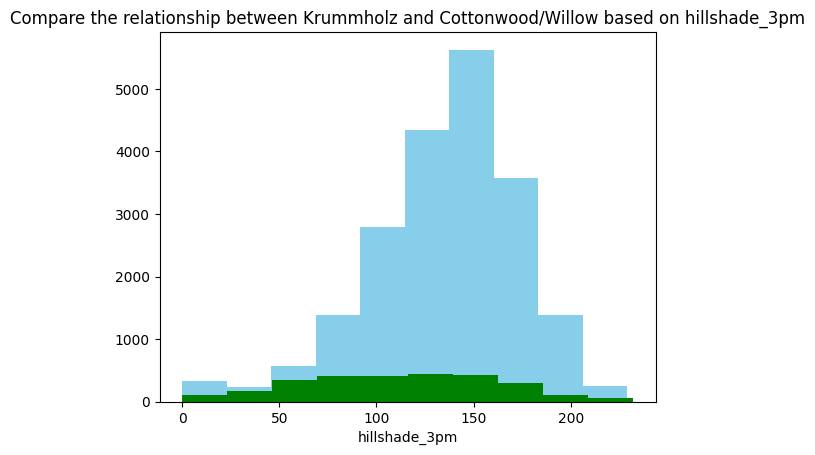

In [14]:
krummholz = covertype[covertype['cover_type'] == 'Krummholz']
cottonwood_willow = covertype[covertype['cover_type'] == 'Cottonwood/Willow']

featuresAll = ['elevation','horizontal_distance_to_hydrology', 'vertical_distance_to_hydrology','hillshade_9am','hillshade_noon','hillshade_3pm']

plt.figure(figsize=(6,10))
for feature in featuresAll:
  plt.hist(krummholz[feature], color = 'skyblue')
  plt.hist(cottonwood_willow[feature], color = 'green')
  plt.xlabel(feature)
  plt.title(f'Compare the relationship between Krummholz and Cottonwood/Willow based on {feature}')
  plt.show()

**Q10) Plot histogram of elevation, aspect, and slope. Discuss the shape of the distribution**

[Text(0.5, 1.0, 'Histogram of elevation')]

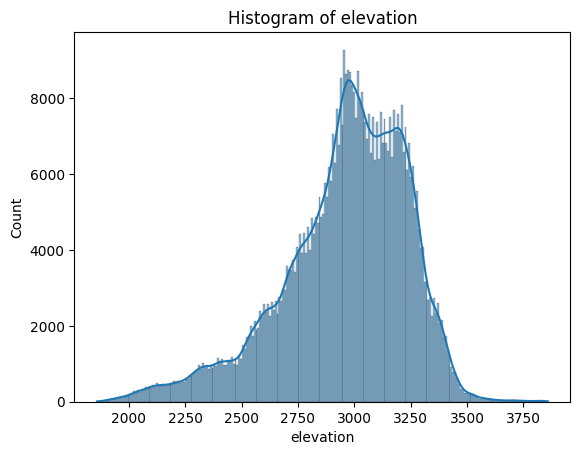

In [15]:
sns.histplot(data=covertype, x="elevation", kde=1).set(title='Histogram of elevation')


[Text(0.5, 1.0, 'Histogram of aspect')]

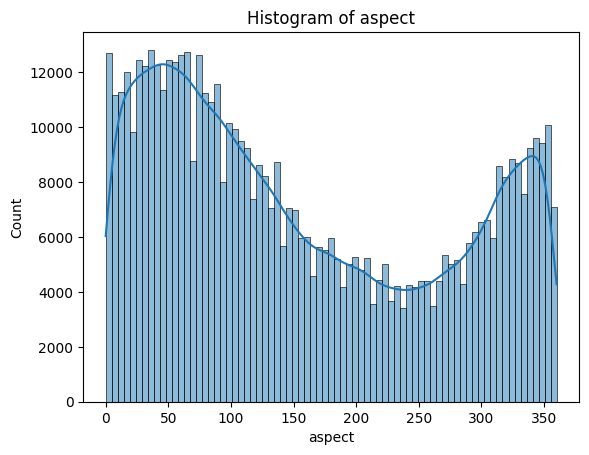

In [16]:
sns.histplot(data=covertype, x="aspect", kde=1).set(title='Histogram of aspect')

[Text(0.5, 1.0, 'Histogram of slope')]

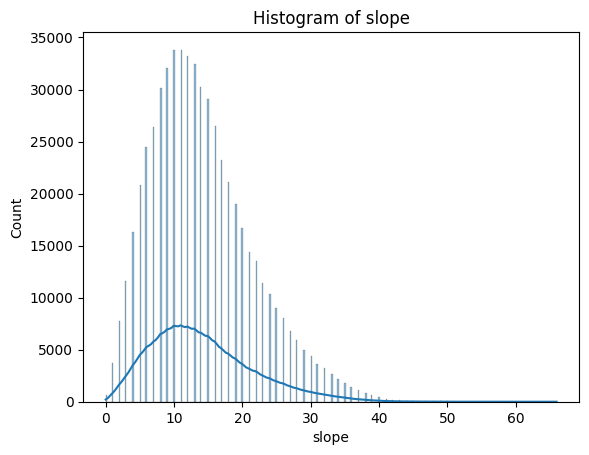

In [17]:
sns.histplot(data=covertype, x="slope", kde=1).set(title='Histogram of slope')

**Q11) For each member in your group, plot another useful visualization from this dataset.**

Gunn Wangwichit 65070503406

[Text(0.5, 1.0, 'Distribution of cover type across different geological zone')]

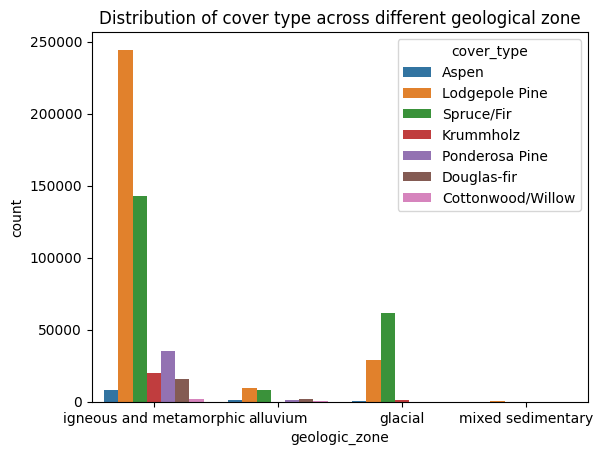

In [18]:
sns.countplot(x='geologic_zone', hue='cover_type',  data=covertype).set(title='Distribution of cover type across different geological zone')

Ratchanon Tarawan 65070503464

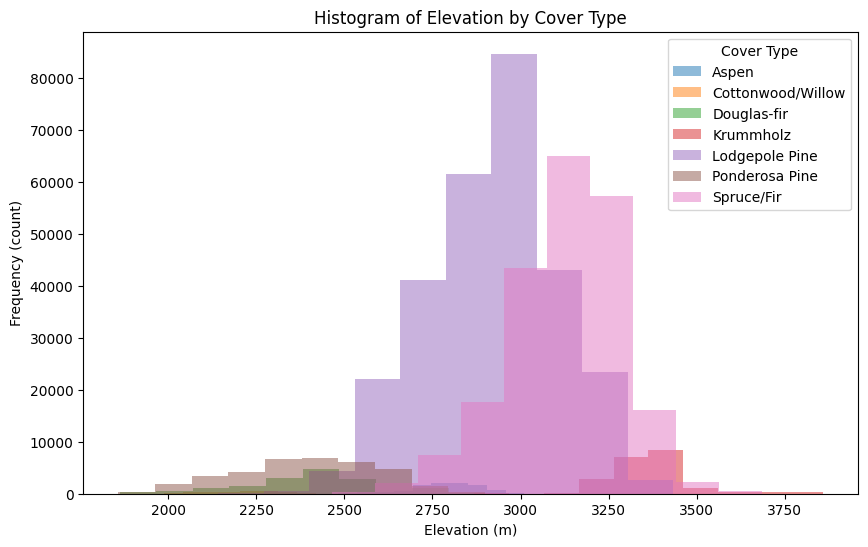

In [19]:
df12= df[['elevation', 'cover_type']]

plt.figure(figsize=(10, 6))

df12.groupby('cover_type')
for cover_type, group in df12.groupby('cover_type'):
    plt.hist(group['elevation'], alpha=0.5, label=cover_type)
    
plt.xlabel('Elevation (m)')
plt.ylabel('Frequency (count)')
plt.title('Histogram of Elevation by Cover Type')
plt.legend(title='Cover Type')
plt.show()

Sikares Nuntipatsakul 65070503439

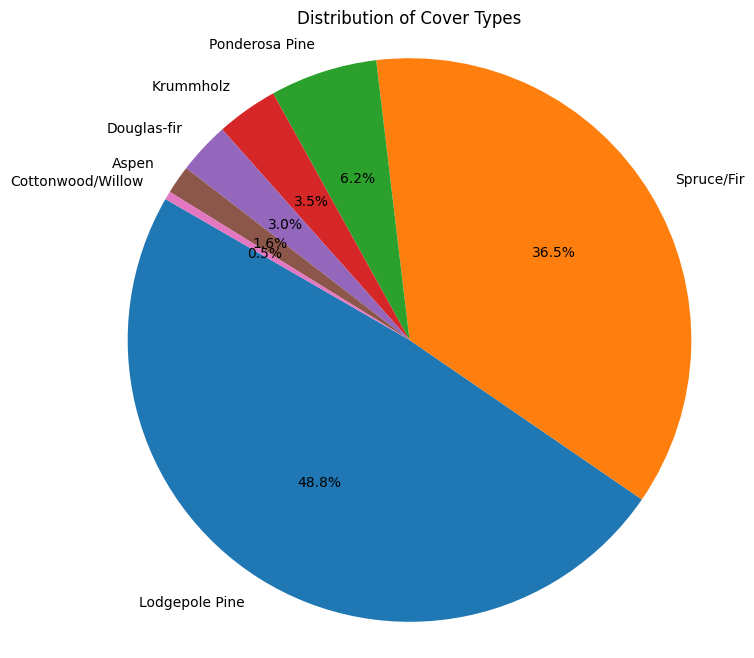

In [20]:
count = covertype['cover_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=150, colors=plt.cm.tab10.colors)
plt.title('Distribution of Cover Types')

plt.axis('equal')
plt.show()

Supanut Wongtanom 65070503437

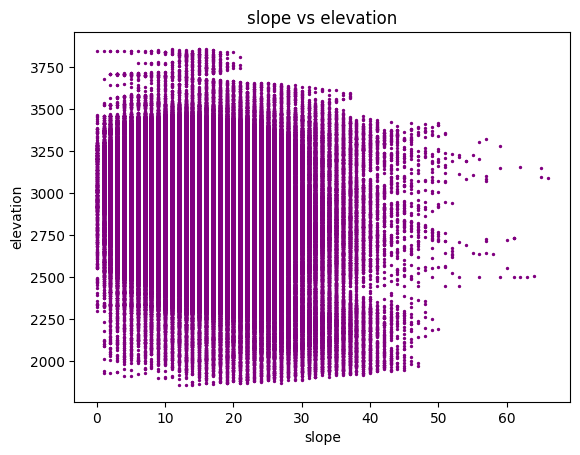

In [22]:
plt.title('slope vs elevation')
plt.xlabel("slope")
plt.ylabel("elevation")
slope = covertype['slope']
elevation = covertype['elevation']
plt.scatter(slope, elevation, s=2, color="purple")
plt.show()

Kanitpong Thokum 65070503401

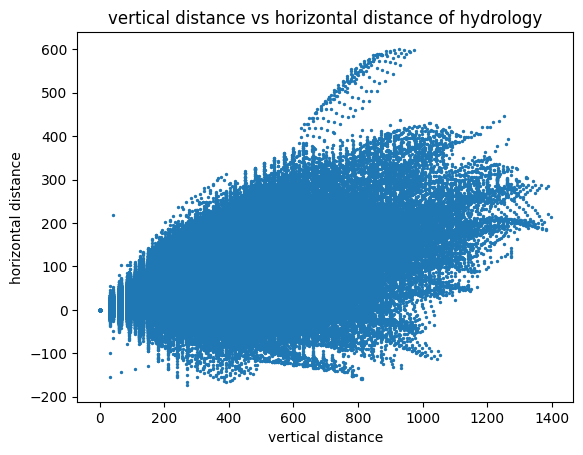

In [23]:
x_axis = covertype['horizontal_distance_to_hydrology']
y_axis = covertype['vertical_distance_to_hydrology']
plt.xlabel("vertical distance")
plt.ylabel("horizontal distance")
plt.scatter(x_axis,y_axis,s=2)
plt.title('vertical distance vs horizontal distance of hydrology')
plt.show()